In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import numpy as np


/Users/admin/Desktop/projects/DeepSign2Text/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False,
                                   validation_split = 0.05)

test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory('data/asl_alphabet_train/',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            subset = 'training')
test_set = train_datagen.flow_from_directory('data/asl_alphabet_train/',
                                            target_size = (100, 100),
                                           batch_size = 32,
                                          class_mode = 'categorical',
                                           subset = 'validation')

Found 82650 images belonging to 29 classes.
Found 4350 images belonging to 29 classes.


In [ ]:
history = model.fit_generator(training_set,
                         epochs = 30,
                         validation_data = test_set,)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('data/asl_alphabet_test/E/E_test.jpg', target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

print("Predicting this is: " + str(result))

## Saving the Model

In [ ]:
# Save the weights
model.save_weights('models/cnn/model_weights.h5')

# Save the model architecture
with open('models/cnn/model_architecture.json', 'w') as f:
    f.write(model.to_json())

## Graph the accuracy and loss

In [143]:
import matplotlib.pyplot as plt
#summarize history for accuracy
plt.plot(loaded_model.history['acc'])
plt.plot(loaded_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model/cnn/accuracy_graph.png")

# summarize history for loss
plt.plot(loaded_model.history['loss'])
plt.plot(loaded_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model/cnn/loss_graph.png")

AttributeError: 'Sequential' object has no attribute 'history'

## Loading the Model

In [4]:
from keras.models import model_from_json

json_file = open('models/cnn/model_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading weights
loaded_model.load_weights("models/cnn/model_weights.h5")

loaded_model.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
loaded_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

## Visualization of the network

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file="resources/cnn.png", show_shapes=True, show_layer_names=True)

## Trying Network Evaluation and Confusion Matrix Generation (unsuccessful)

In [8]:
test_set = train_datagen.flow_from_directory('data/asl_alphabet_test/',
                                             target_size = (100, 100),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             shuffle=False)

Found 29 images belonging to 29 classes.


In [96]:
labels = []
test_set.class_indices
for key in test_set.class_indices:
    labels.append(key)
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [71]:
predictions = loaded_model.predict_generator(test_set)

In [124]:
arr = []
for i in range(0, 29):
    arr.append(np.argmax(predictions[i]))
print(arr)
nn = sorted(arr)
print(nn)

[10, 24, 0, 20, 1, 2, 17, 23, 11, 14, 16, 3, 13, 21, 12, 28, 15, 6, 26, 4, 22, 18, 25, 7, 8, 19, 27, 9, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


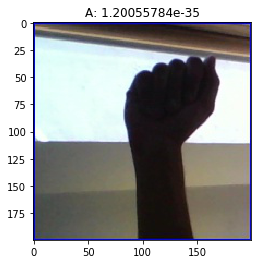

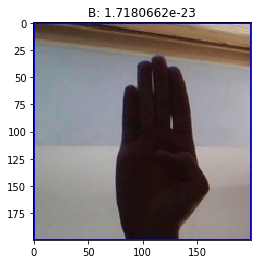

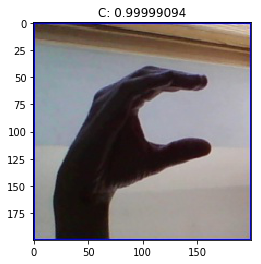

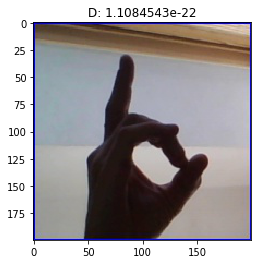

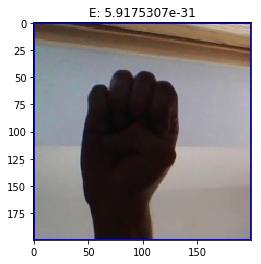

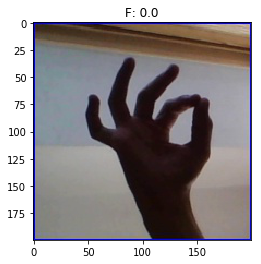

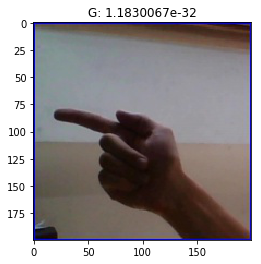

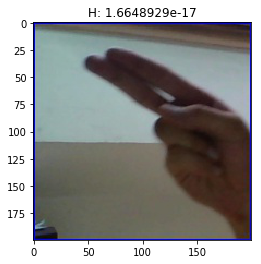

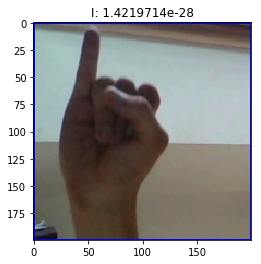

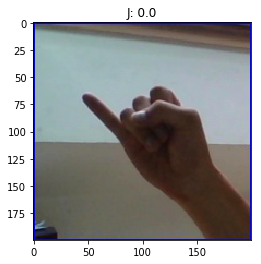

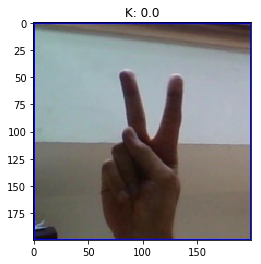

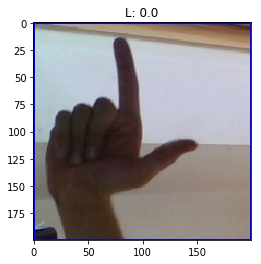

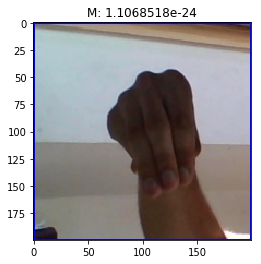

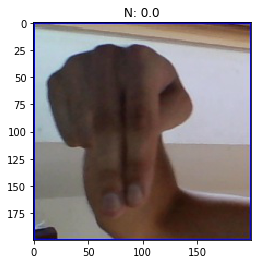

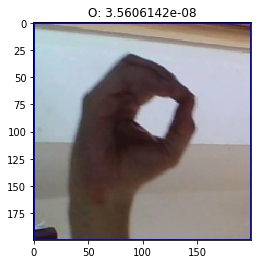

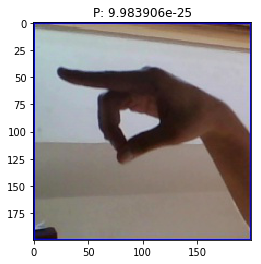

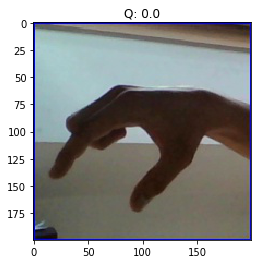

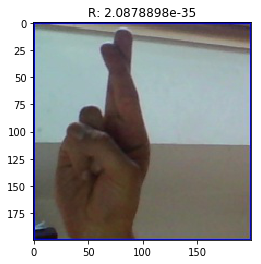

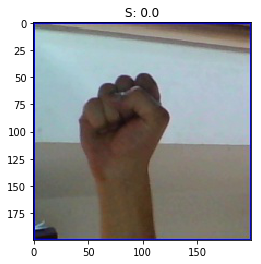

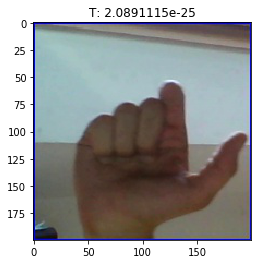

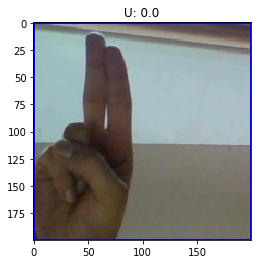

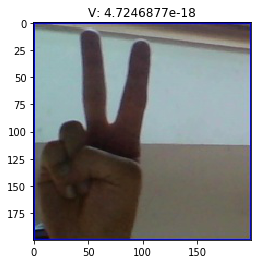

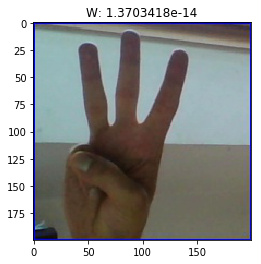

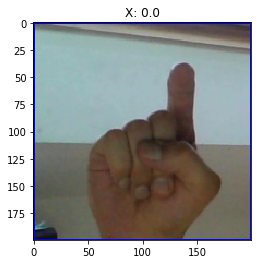

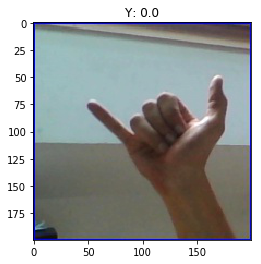

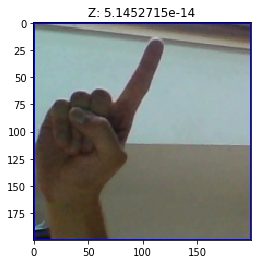

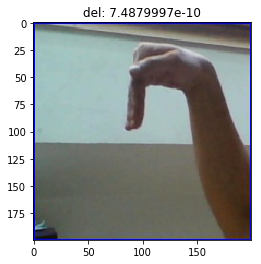

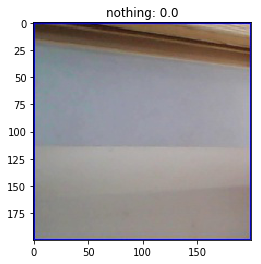

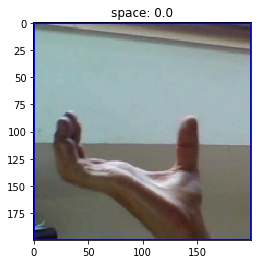

In [99]:
import matplotlib.image as mpimg

labels = []
test_set.class_indices
for key in test_set.class_indices:
    labels.append(key)
    
for i in range(0, 29):
    img=mpimg.imread('data/asl_alphabet_test/'+str(labels[i])+'/' + str(labels[i])+'_test.jpg')
    plt.title(str(labels[i])+": " + str(predictions[i][0]))
    imgplot = plt.imshow(img)
    plt.show()

In [140]:
from keras.preprocessing import image

test_image = image.load_img('data/asl_alphabet_test/E/E_test.jpg', target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = loaded_model.predict_classes(test_image)
print(result)

[4]


In [ ]:
score = model.evaluate(np.expand_dims(training_set, axis=3), test_set, batch_size=32)
print(score)